# External modules

In [53]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [54]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [55]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [56]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./03_application_edf_wind/vent.csv", sep = ","))

In [57]:
str(data)

'data.frame':	10627 obs. of  2 variables:
 $ Date: chr  "1981-01-01" "1981-01-02" "1981-01-03" "1981-01-04" ...
 $ Vent: num  16 17 21 18 13 19 10 6 7 13 ...


In [58]:
x_raw <- data$Vent

# Data description

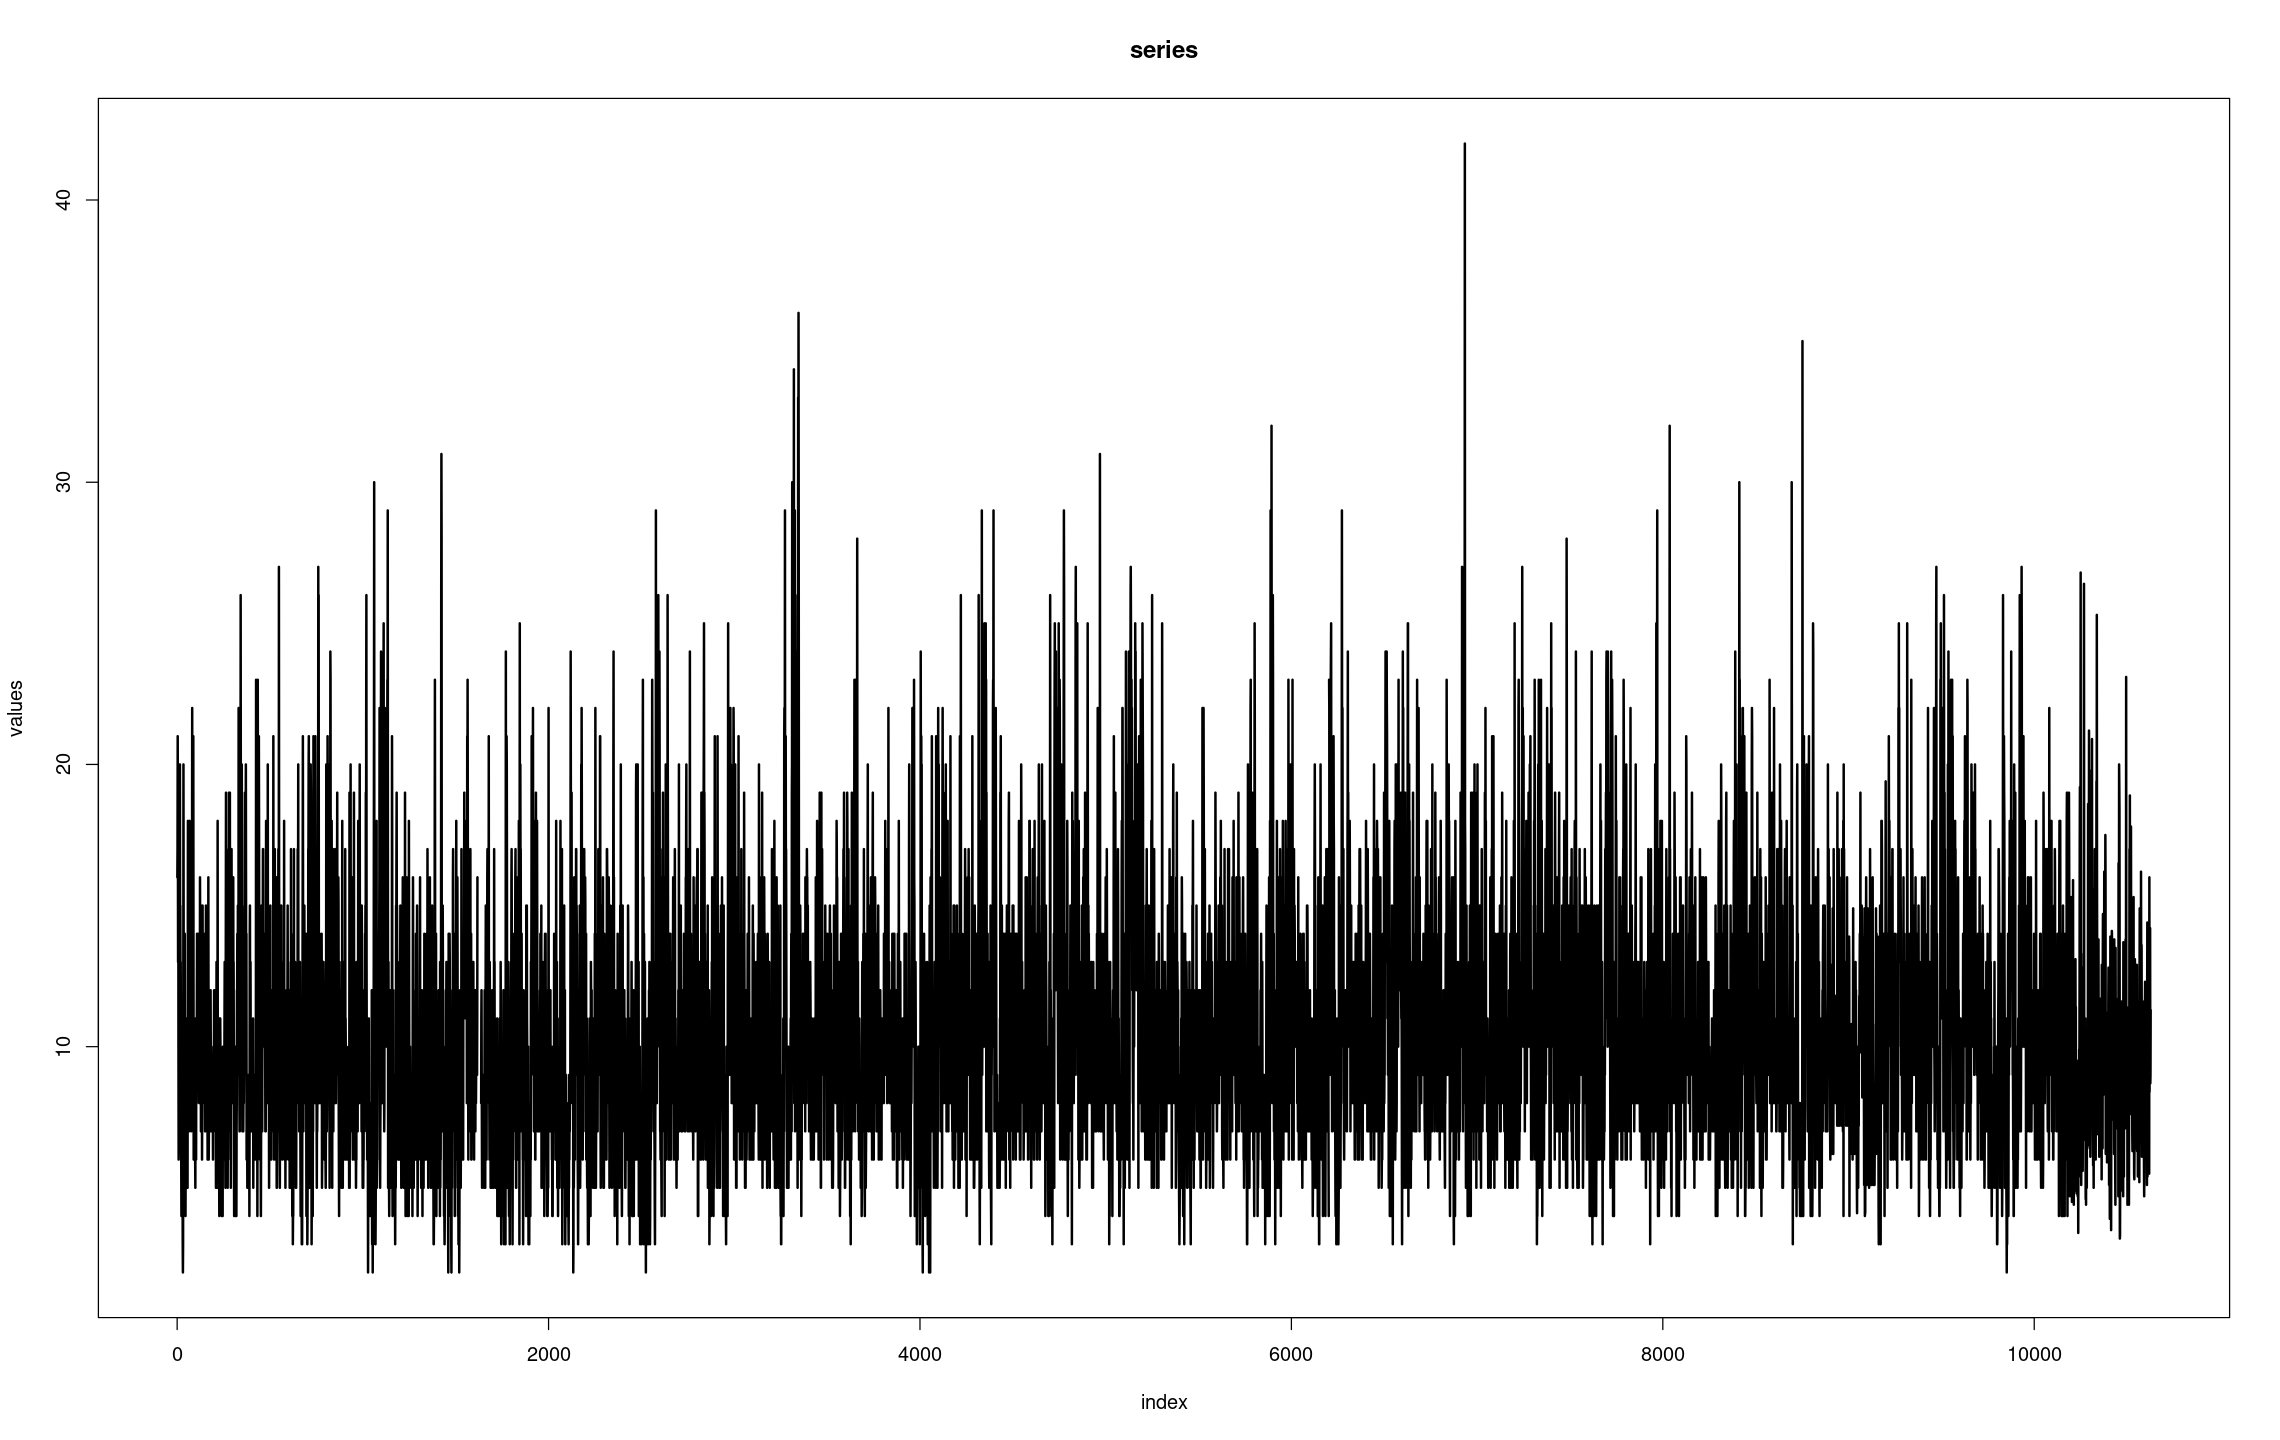

In [59]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [16]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

  length       n    NAs  unique     0s   mean  meanCI'
  10'627  10'607     20     160      0  10.56   10.48
           99.8%   0.2%           0.0%          10.64
                                                     
     .05     .10    .25  median    .75    .90     .95
    5.00    6.00   8.00   10.00  13.00  16.00   19.00
                                                     
   range      sd  vcoef     mad    IQR   skew    kurt
   40.00    4.27   0.40    4.45   5.00   1.08    1.95
                                                     
lowest : 2.0 (13), 3.0 (85), 3.2, 3.3, 3.4
highest: 33.0, 34.0, 35.0, 36.0, 42.0

heap(?): remarkable frequency (10.6%) for the mode(s) (= 10)

' 95%-CI (classic)


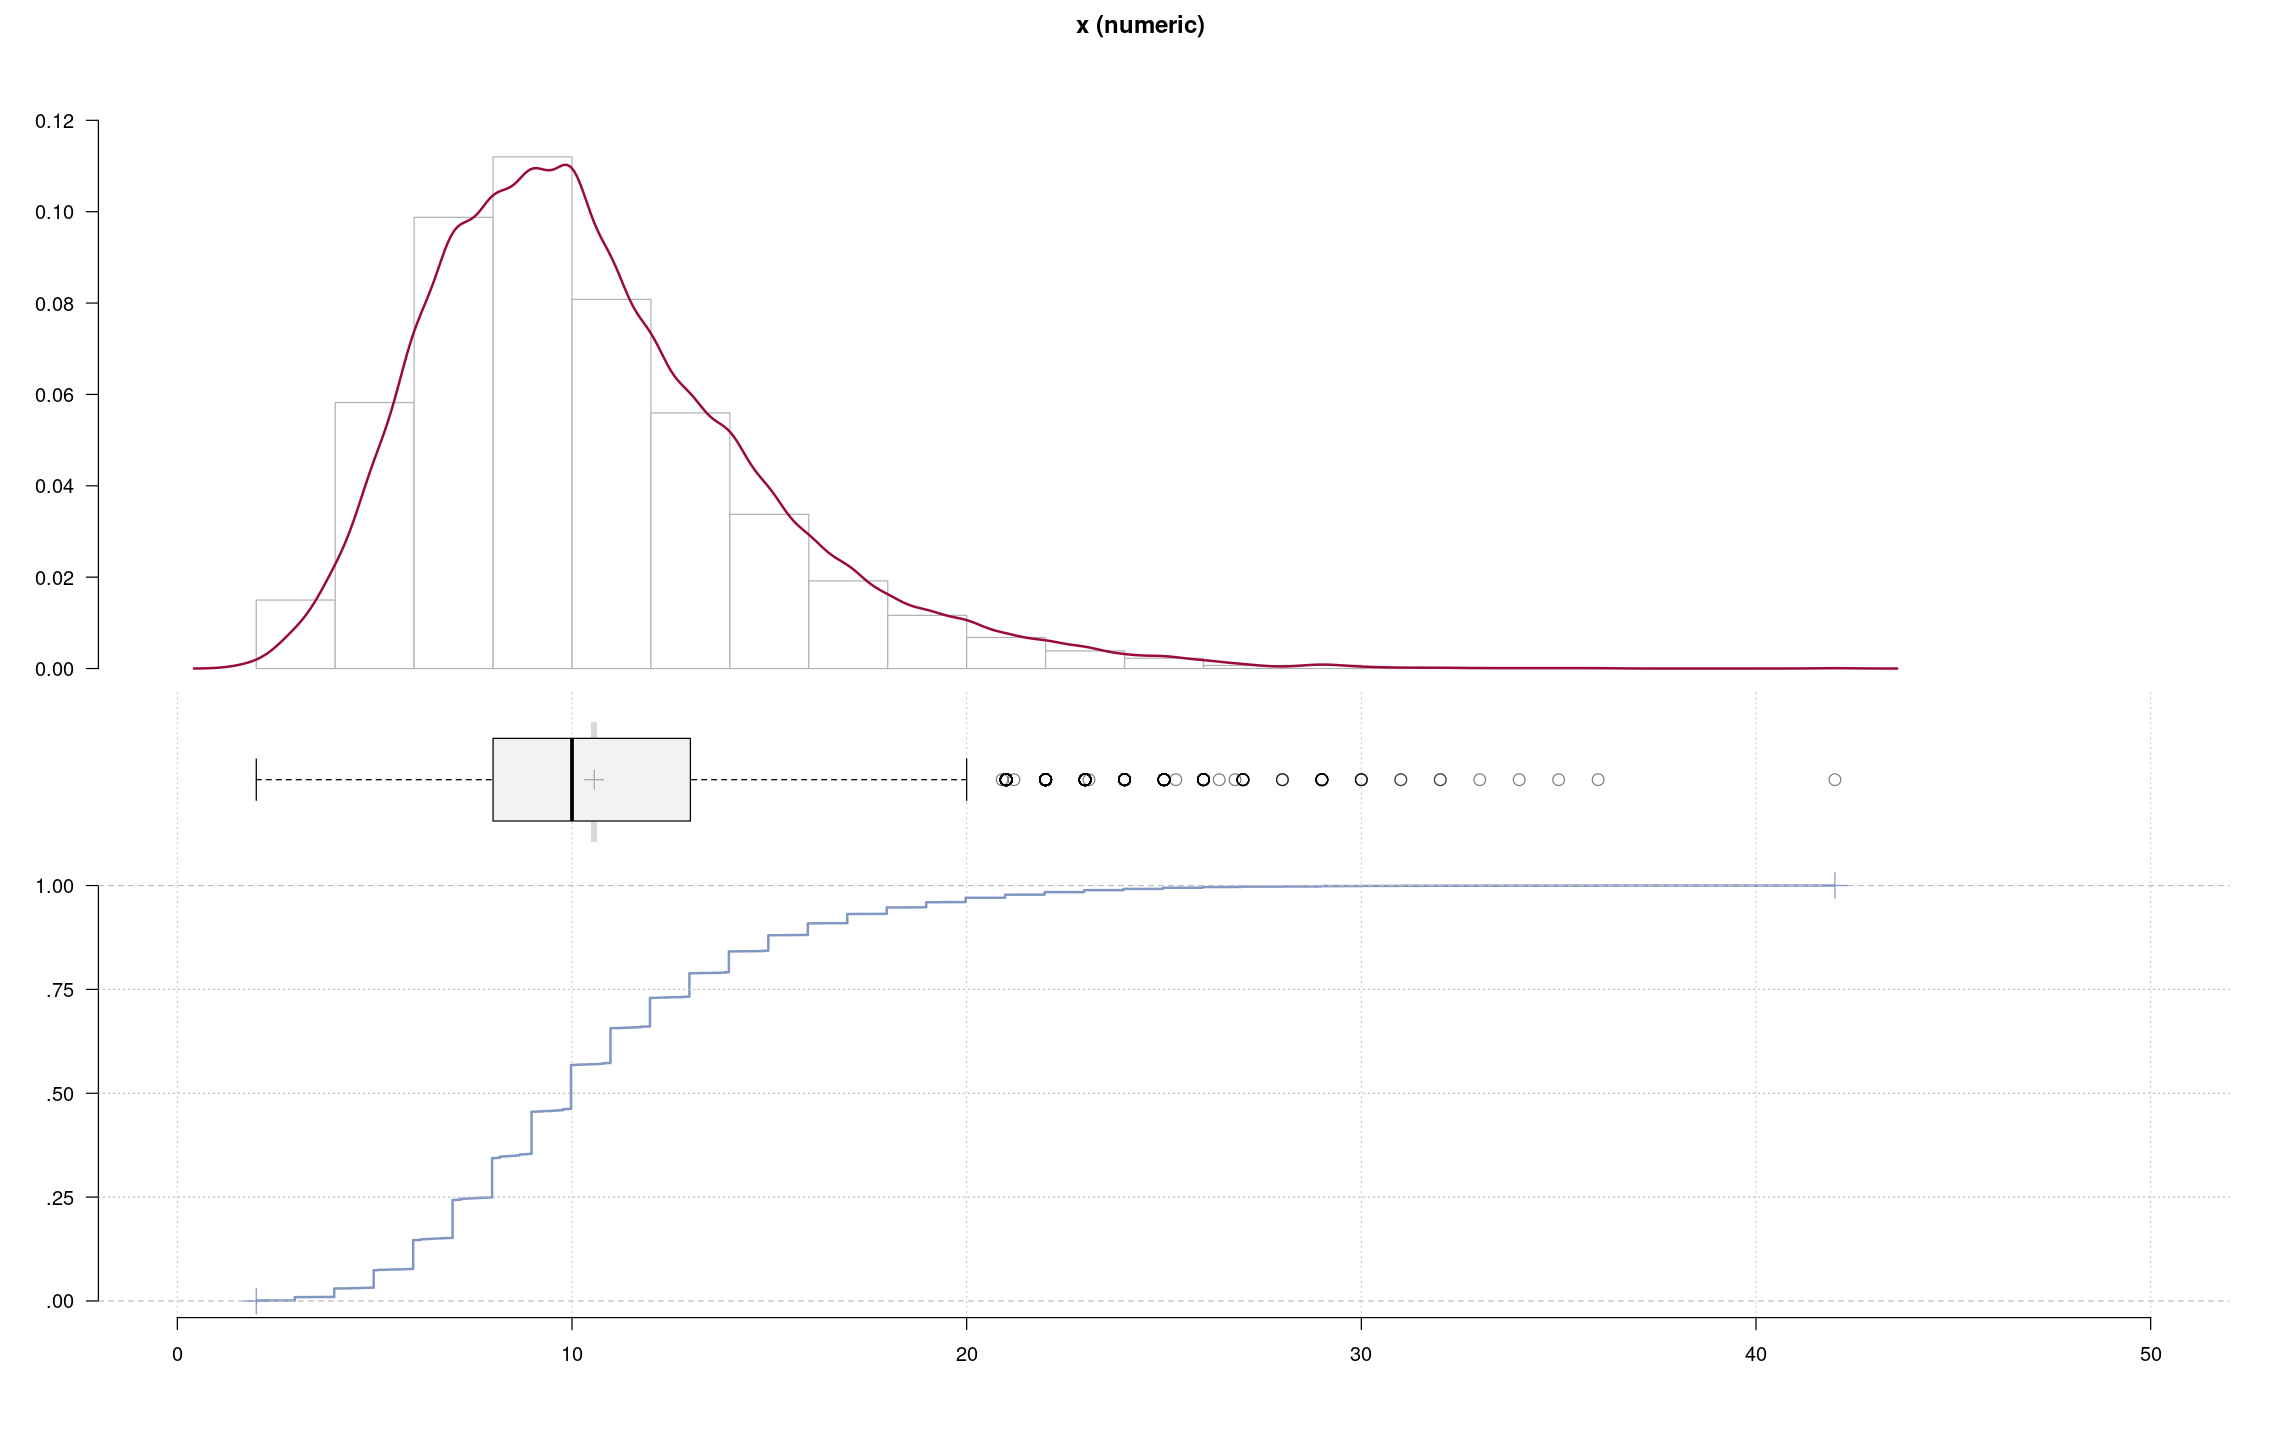

In [17]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [42]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 2.0000  8.0000 10.0000 10.5637 13.0000 42.0000 

In [24]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [20]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 31


In [21]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 212


In [22]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 12


In [23]:
print(median(x))

[1] 10


In [24]:
print(calculate_mode(x))

[1] 9.796388198


In [25]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = 0.089, m = 50)

print(candidate_block_sizes)

  [1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
 [37]  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
 [55]  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
 [73]  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
 [91]  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
[109] 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
[127] 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
[145] 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
[163] 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
[181] 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
[199] 200 201 202 203 204 205 206 207 208 209 210 211 212


In [26]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [27]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [28]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

        loc_star  scale_star      shape_star
31   8.551867153 3.701690691 -0.012987988477
32   8.719969815 3.490292073  0.003795103364
33   8.678691450 3.676408170 -0.014457874168
34   8.016024232 4.139411731 -0.046732529014
71  10.069522341 2.756577330  0.039222043151
82   9.834722274 2.936693854  0.025594064738
101  1.731118578 6.647386853 -0.125267981939


In [29]:
print(gev_mixture_model_object$weights)

             31              32              33              34              71 
0.0002778549597 0.0008335648791 0.0002778549597 0.1480966935260 0.7982772992498 
             82             101 
0.0466796332315 0.0055570991942 


In [30]:
print(which.max(gev_mixture_model_object$weights))

71 
 5 


In [31]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 5


In [32]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 5


In [33]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 7


In [34]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
9653.603165 9849.873440 


In [35]:
print(gev_mixture_model_object$threshold)

[1] 11.9


In [36]:
print(gev_mixture_model_object$equivalent_block_sizes)

  [1]  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
 [19]  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
 [37]  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
 [55]  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 [73] 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 [91] 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
[109] 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
[127] 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
[145] 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
[163] 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
[181] 211 212


## Diagnostic

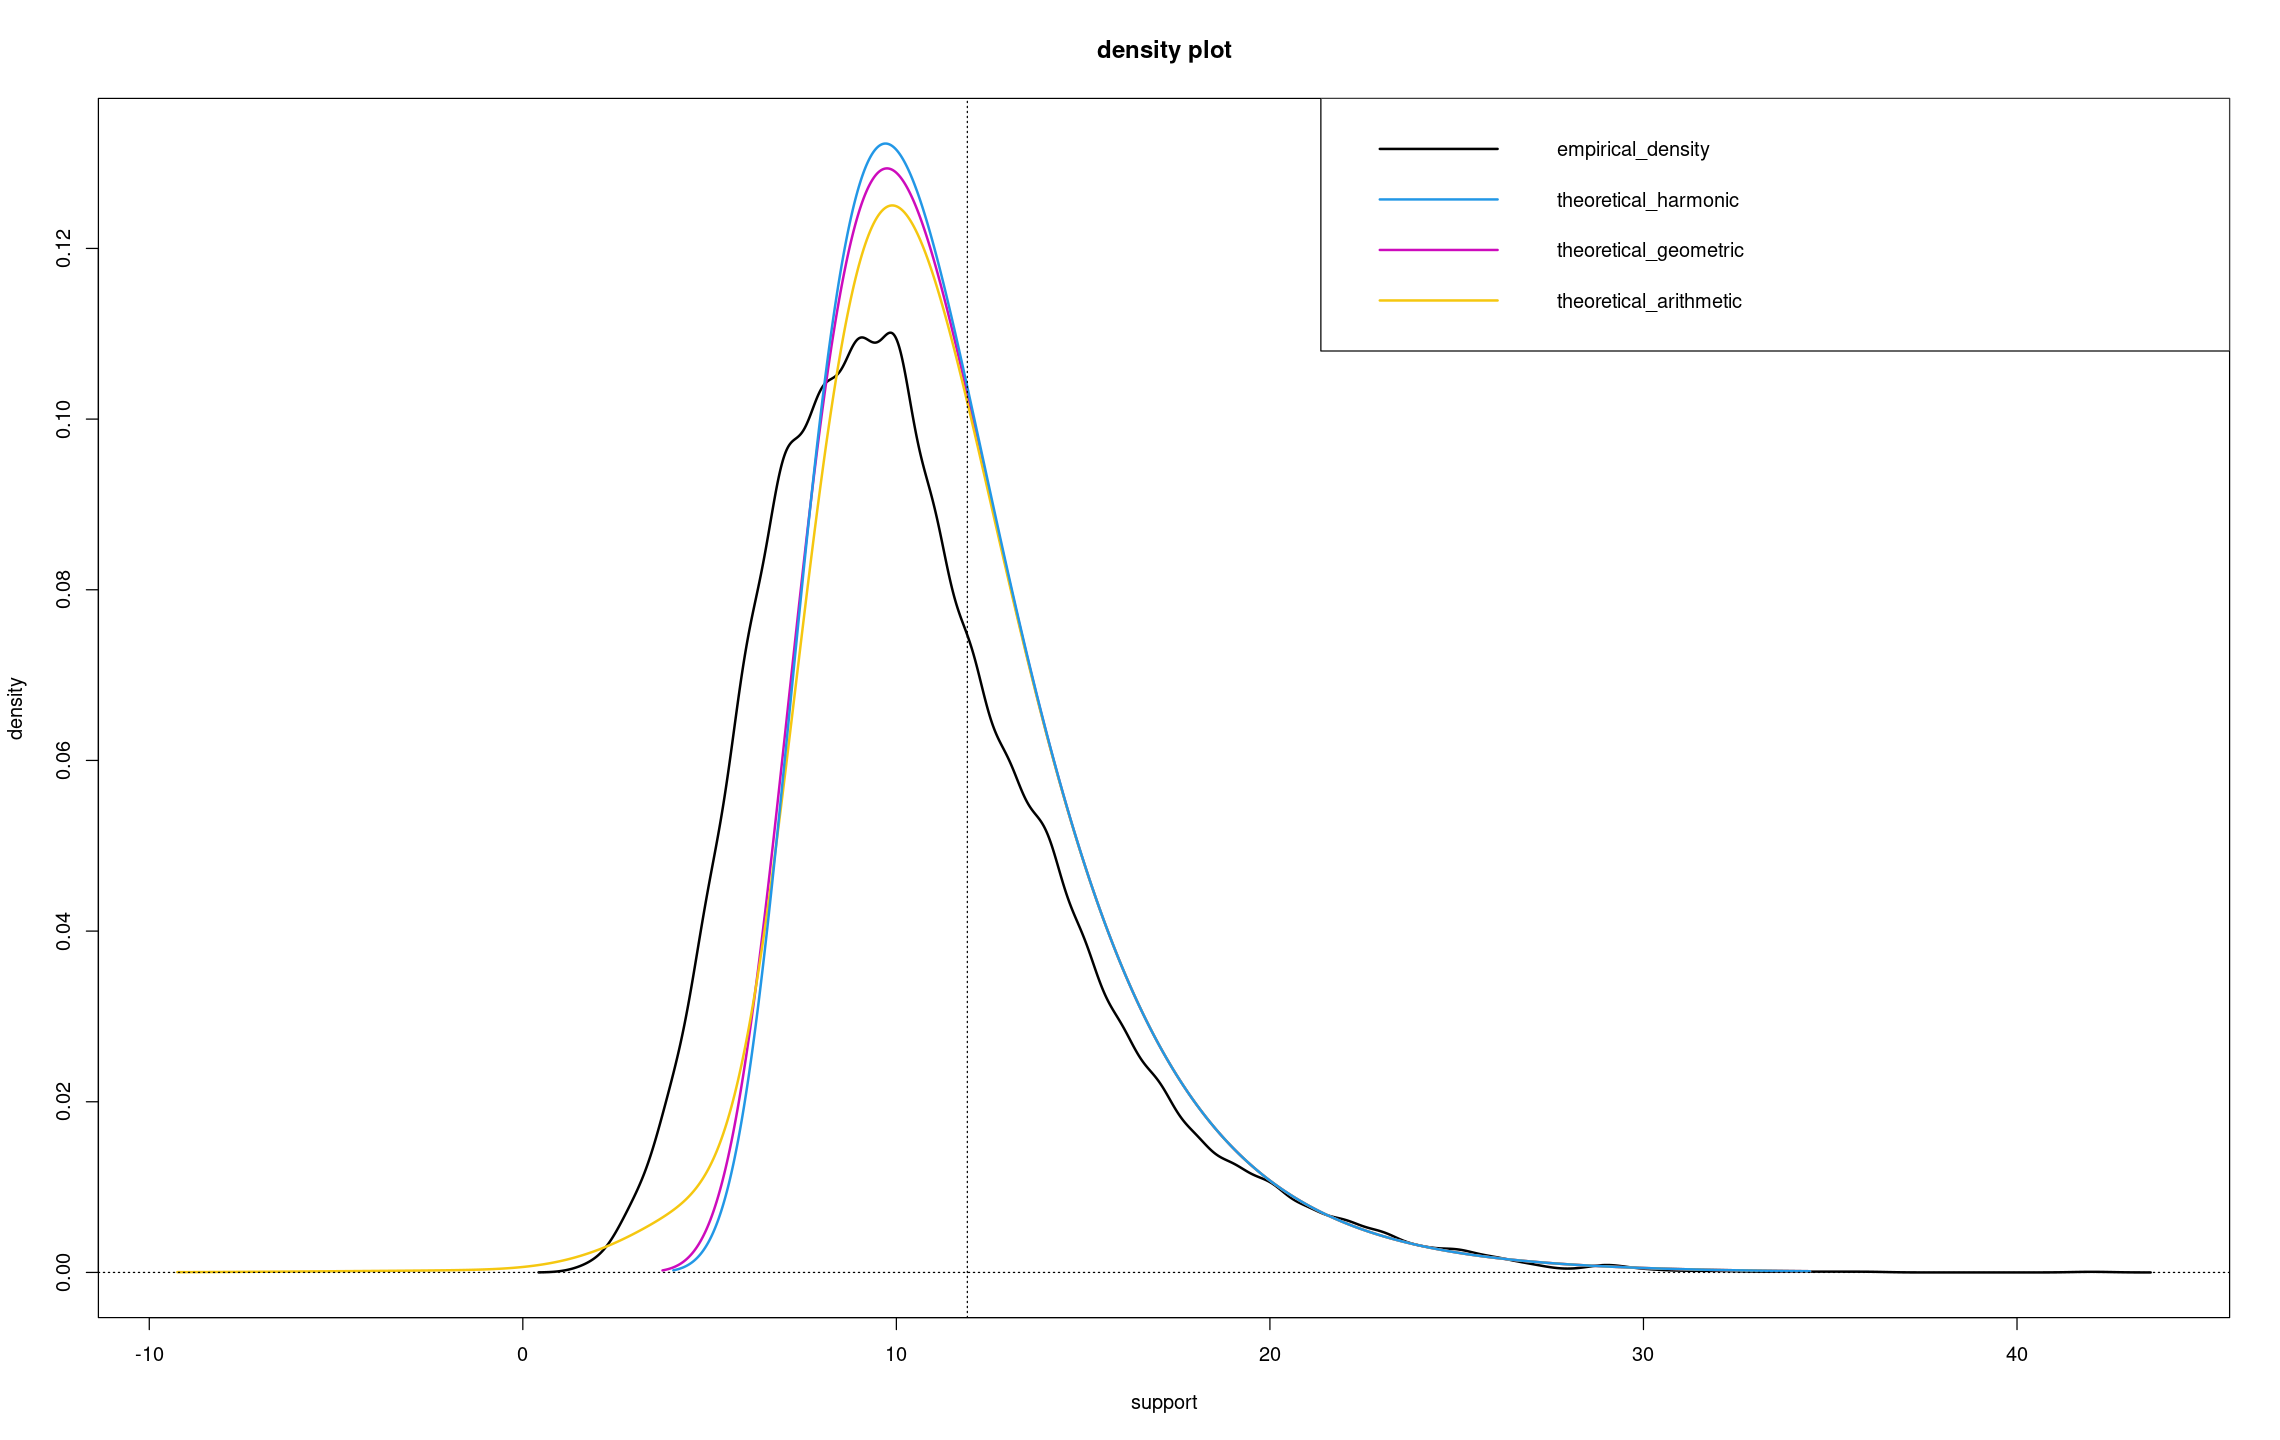

In [37]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

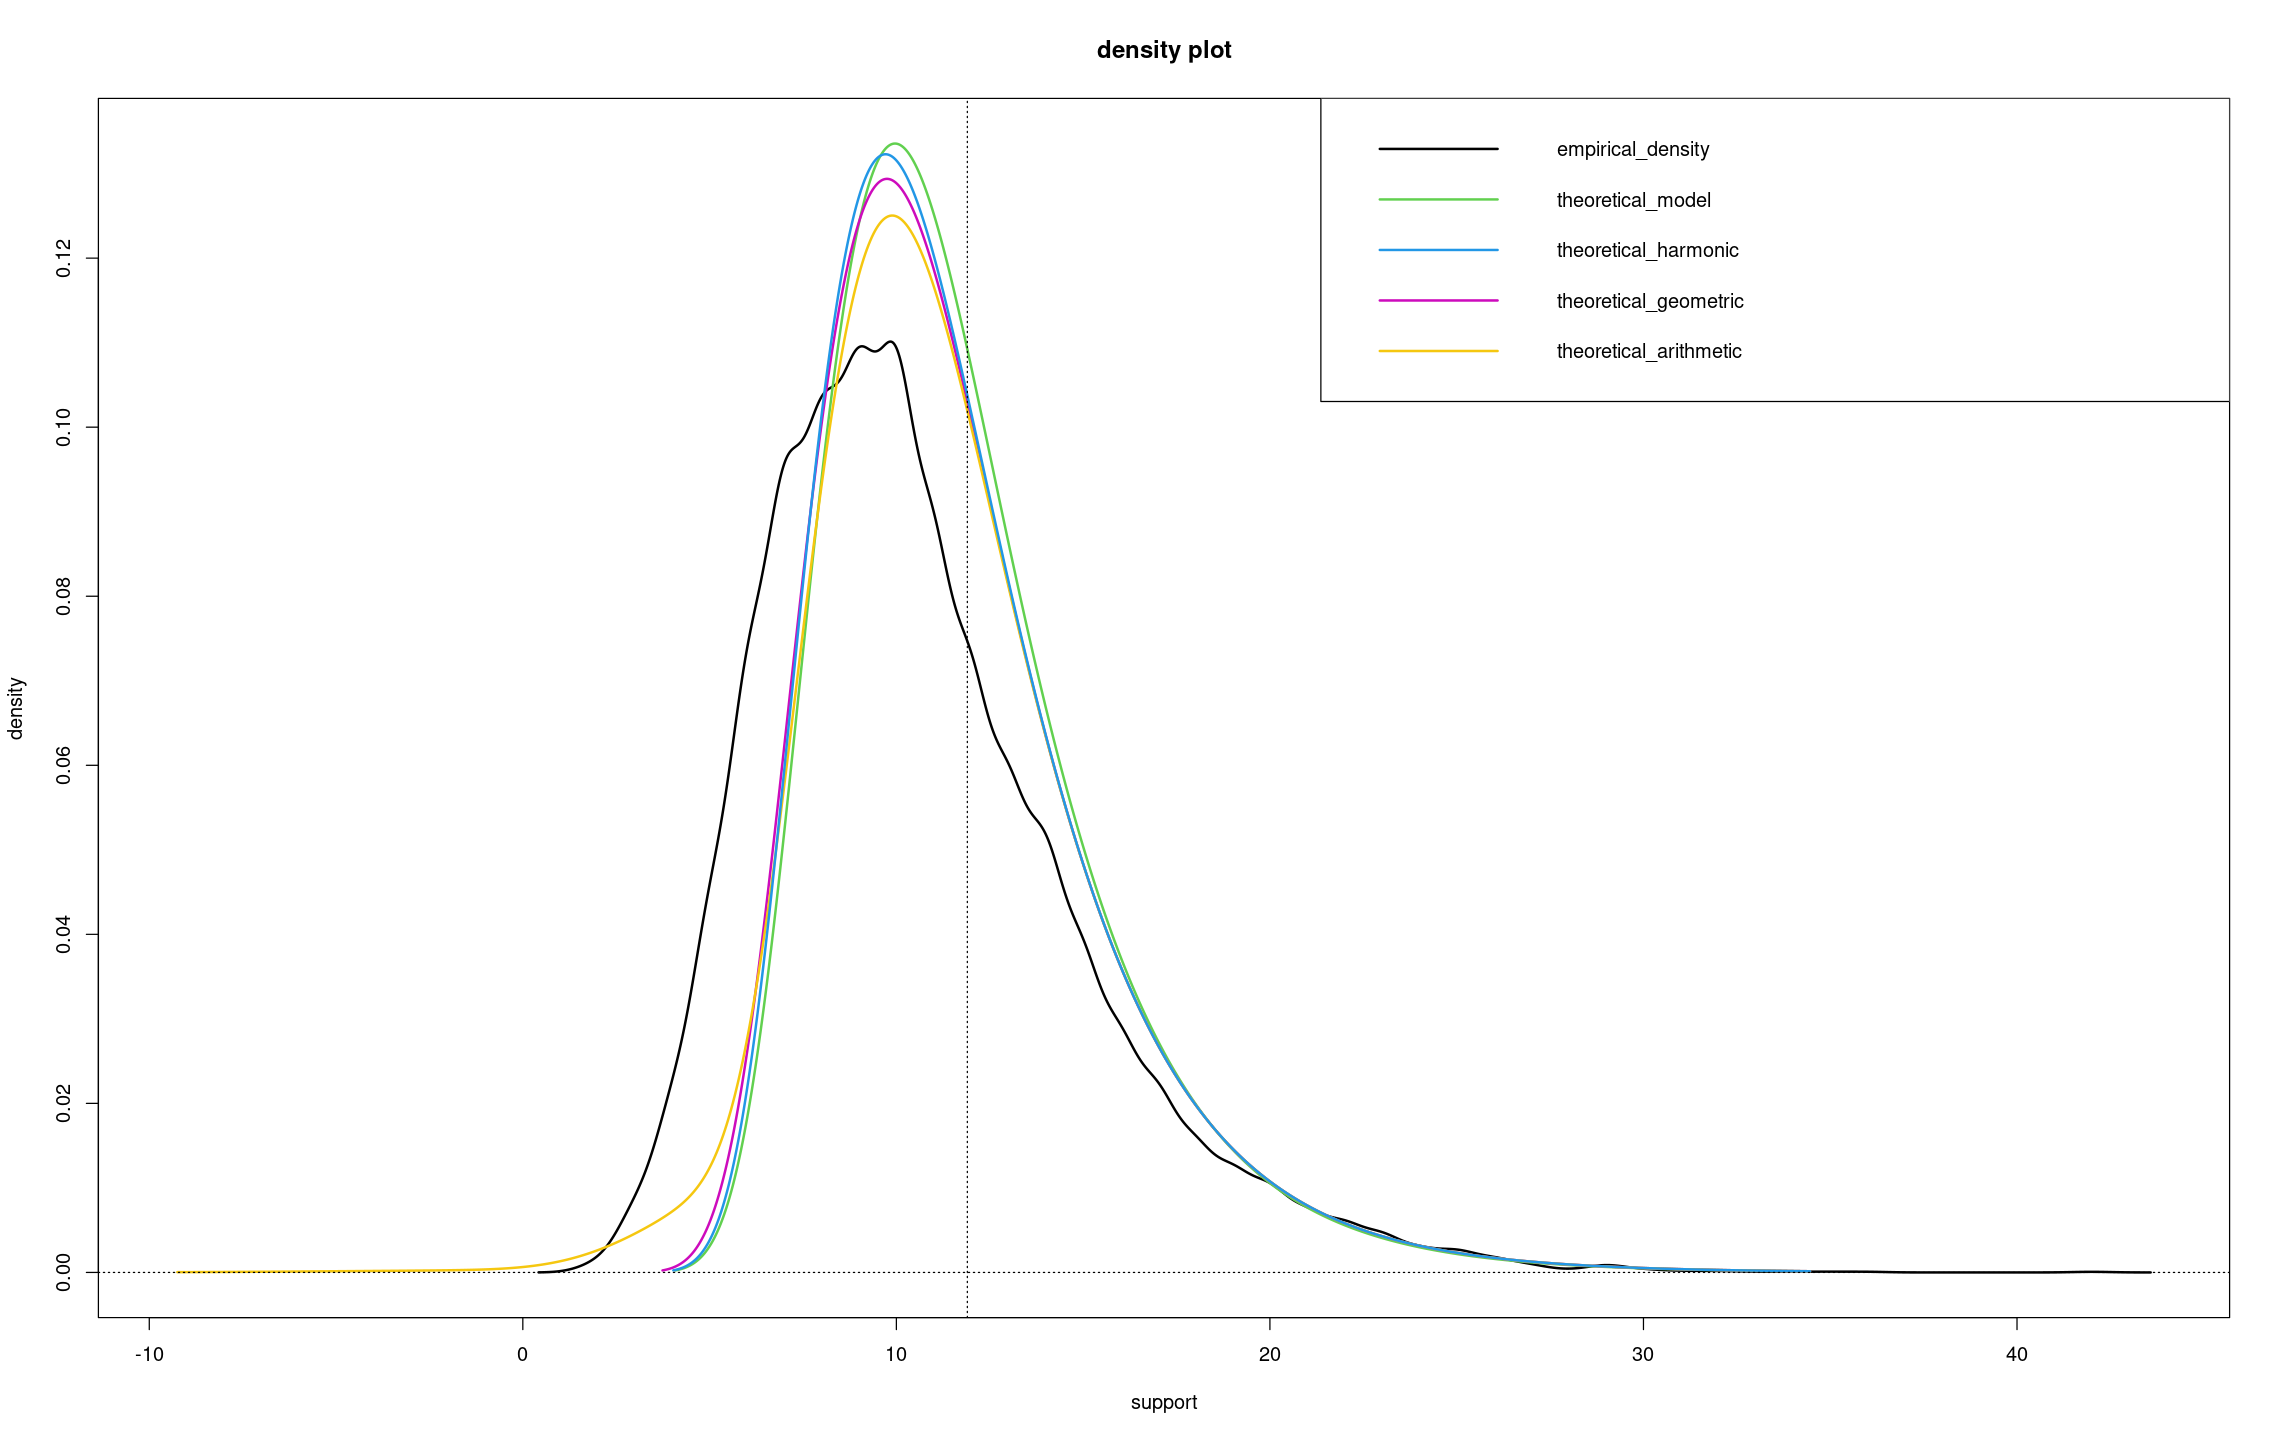

In [38]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

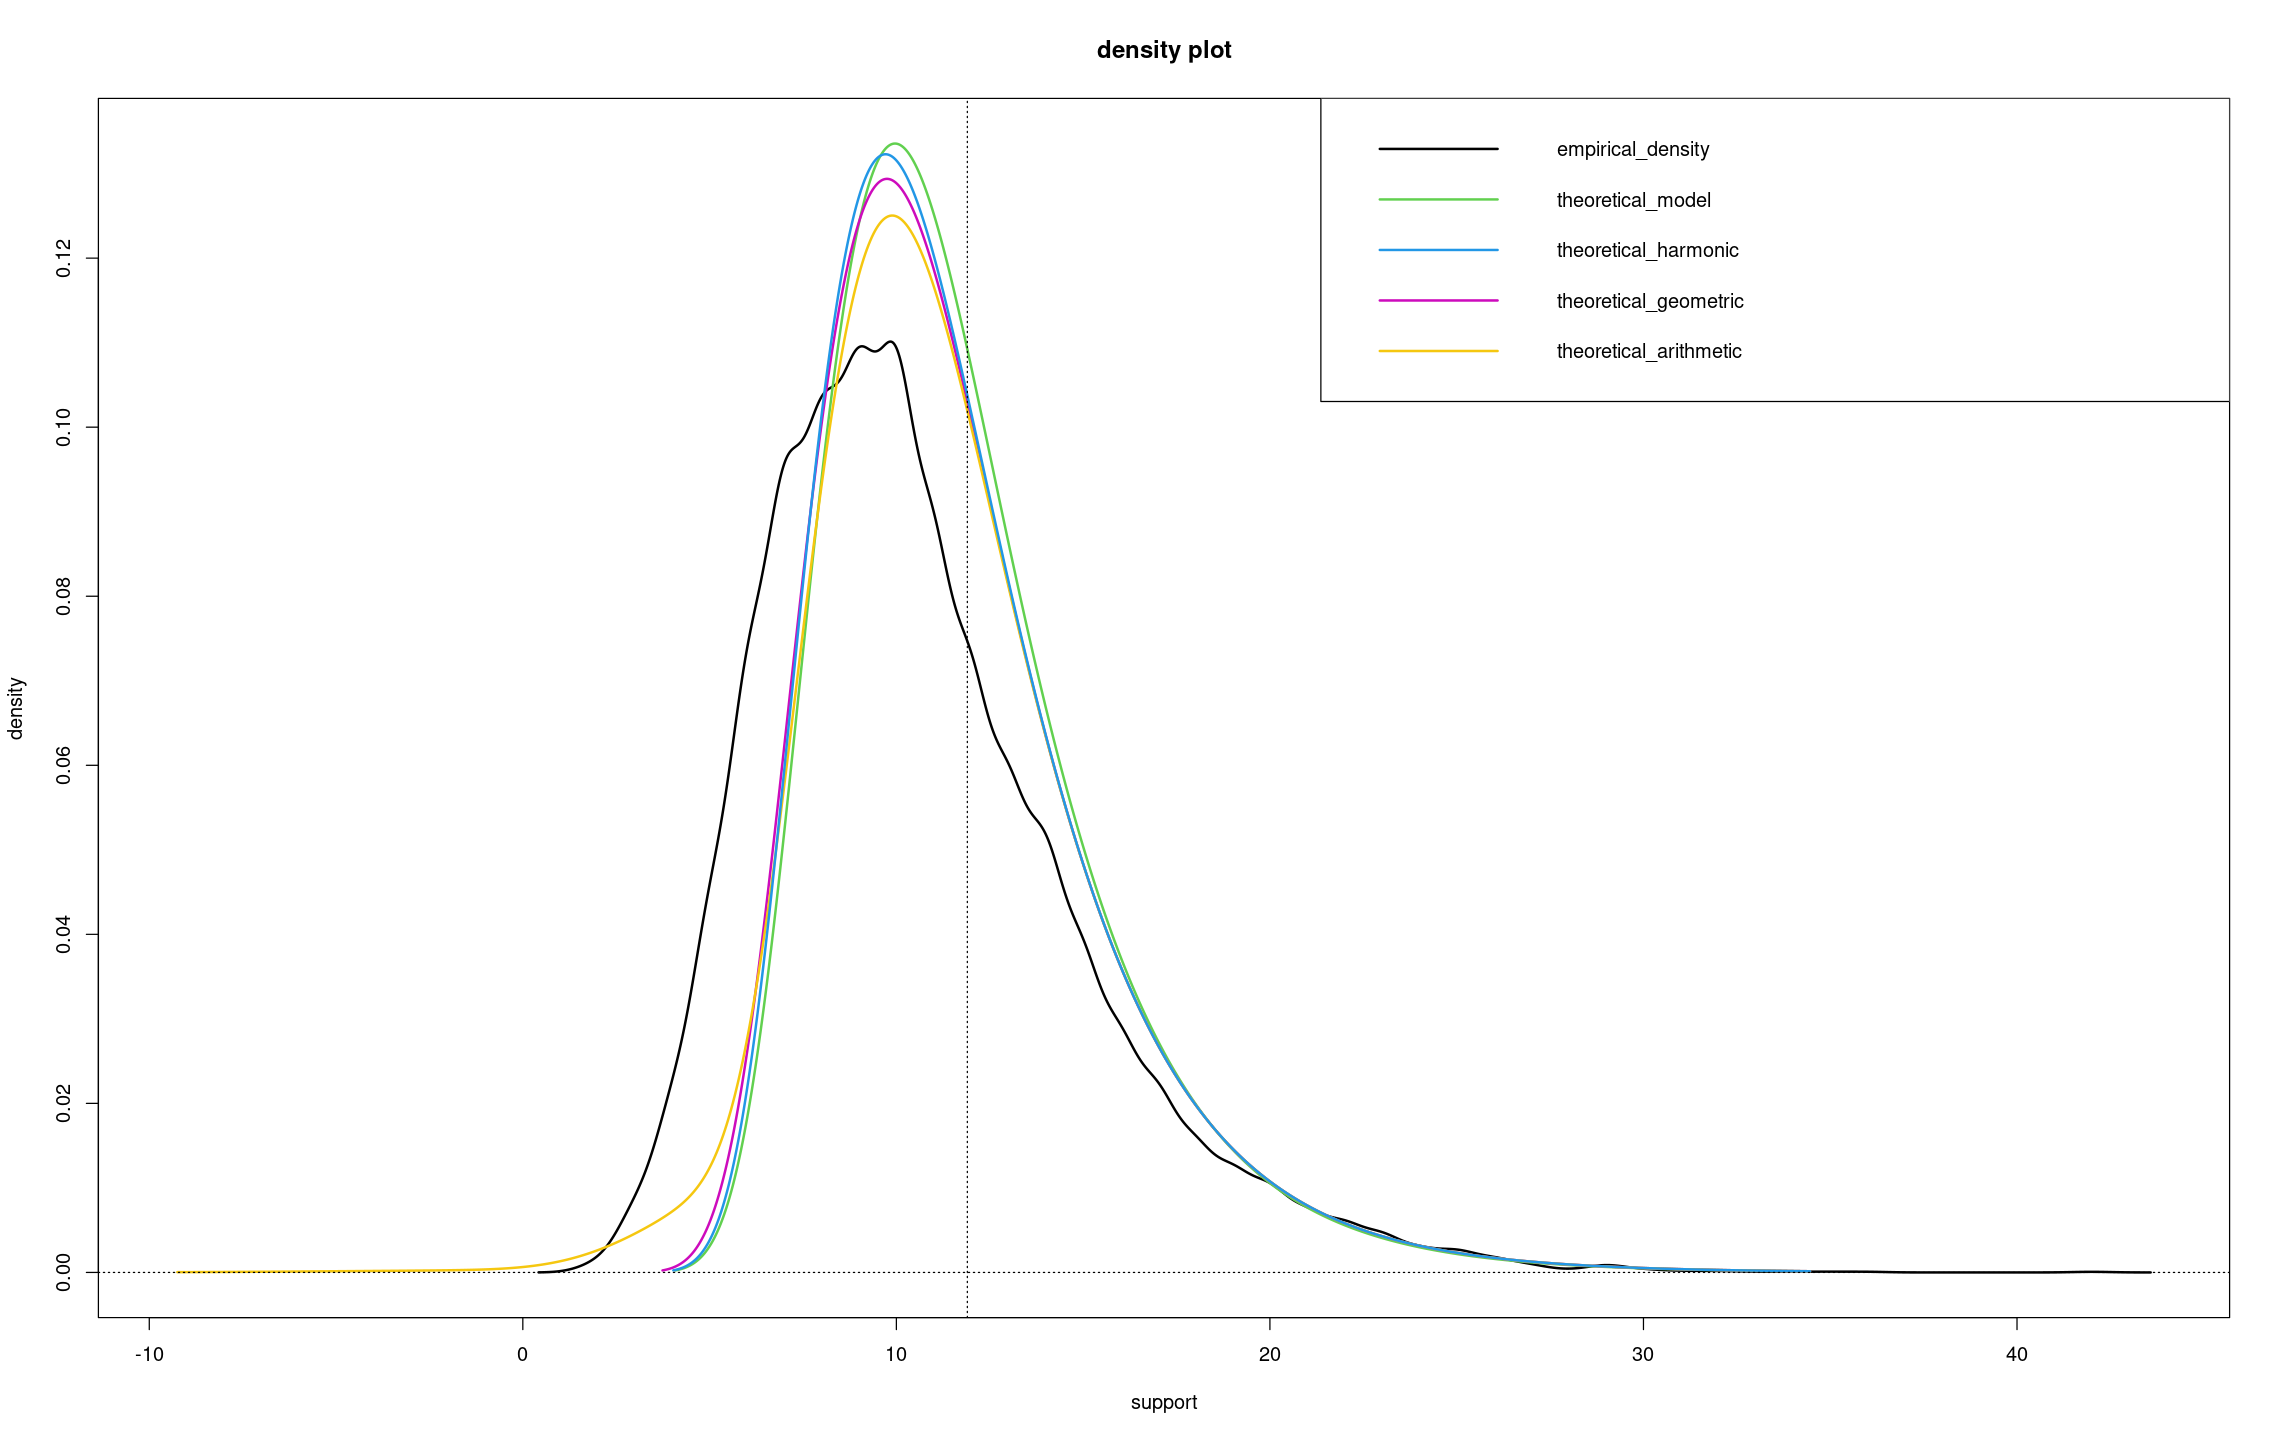

In [39]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

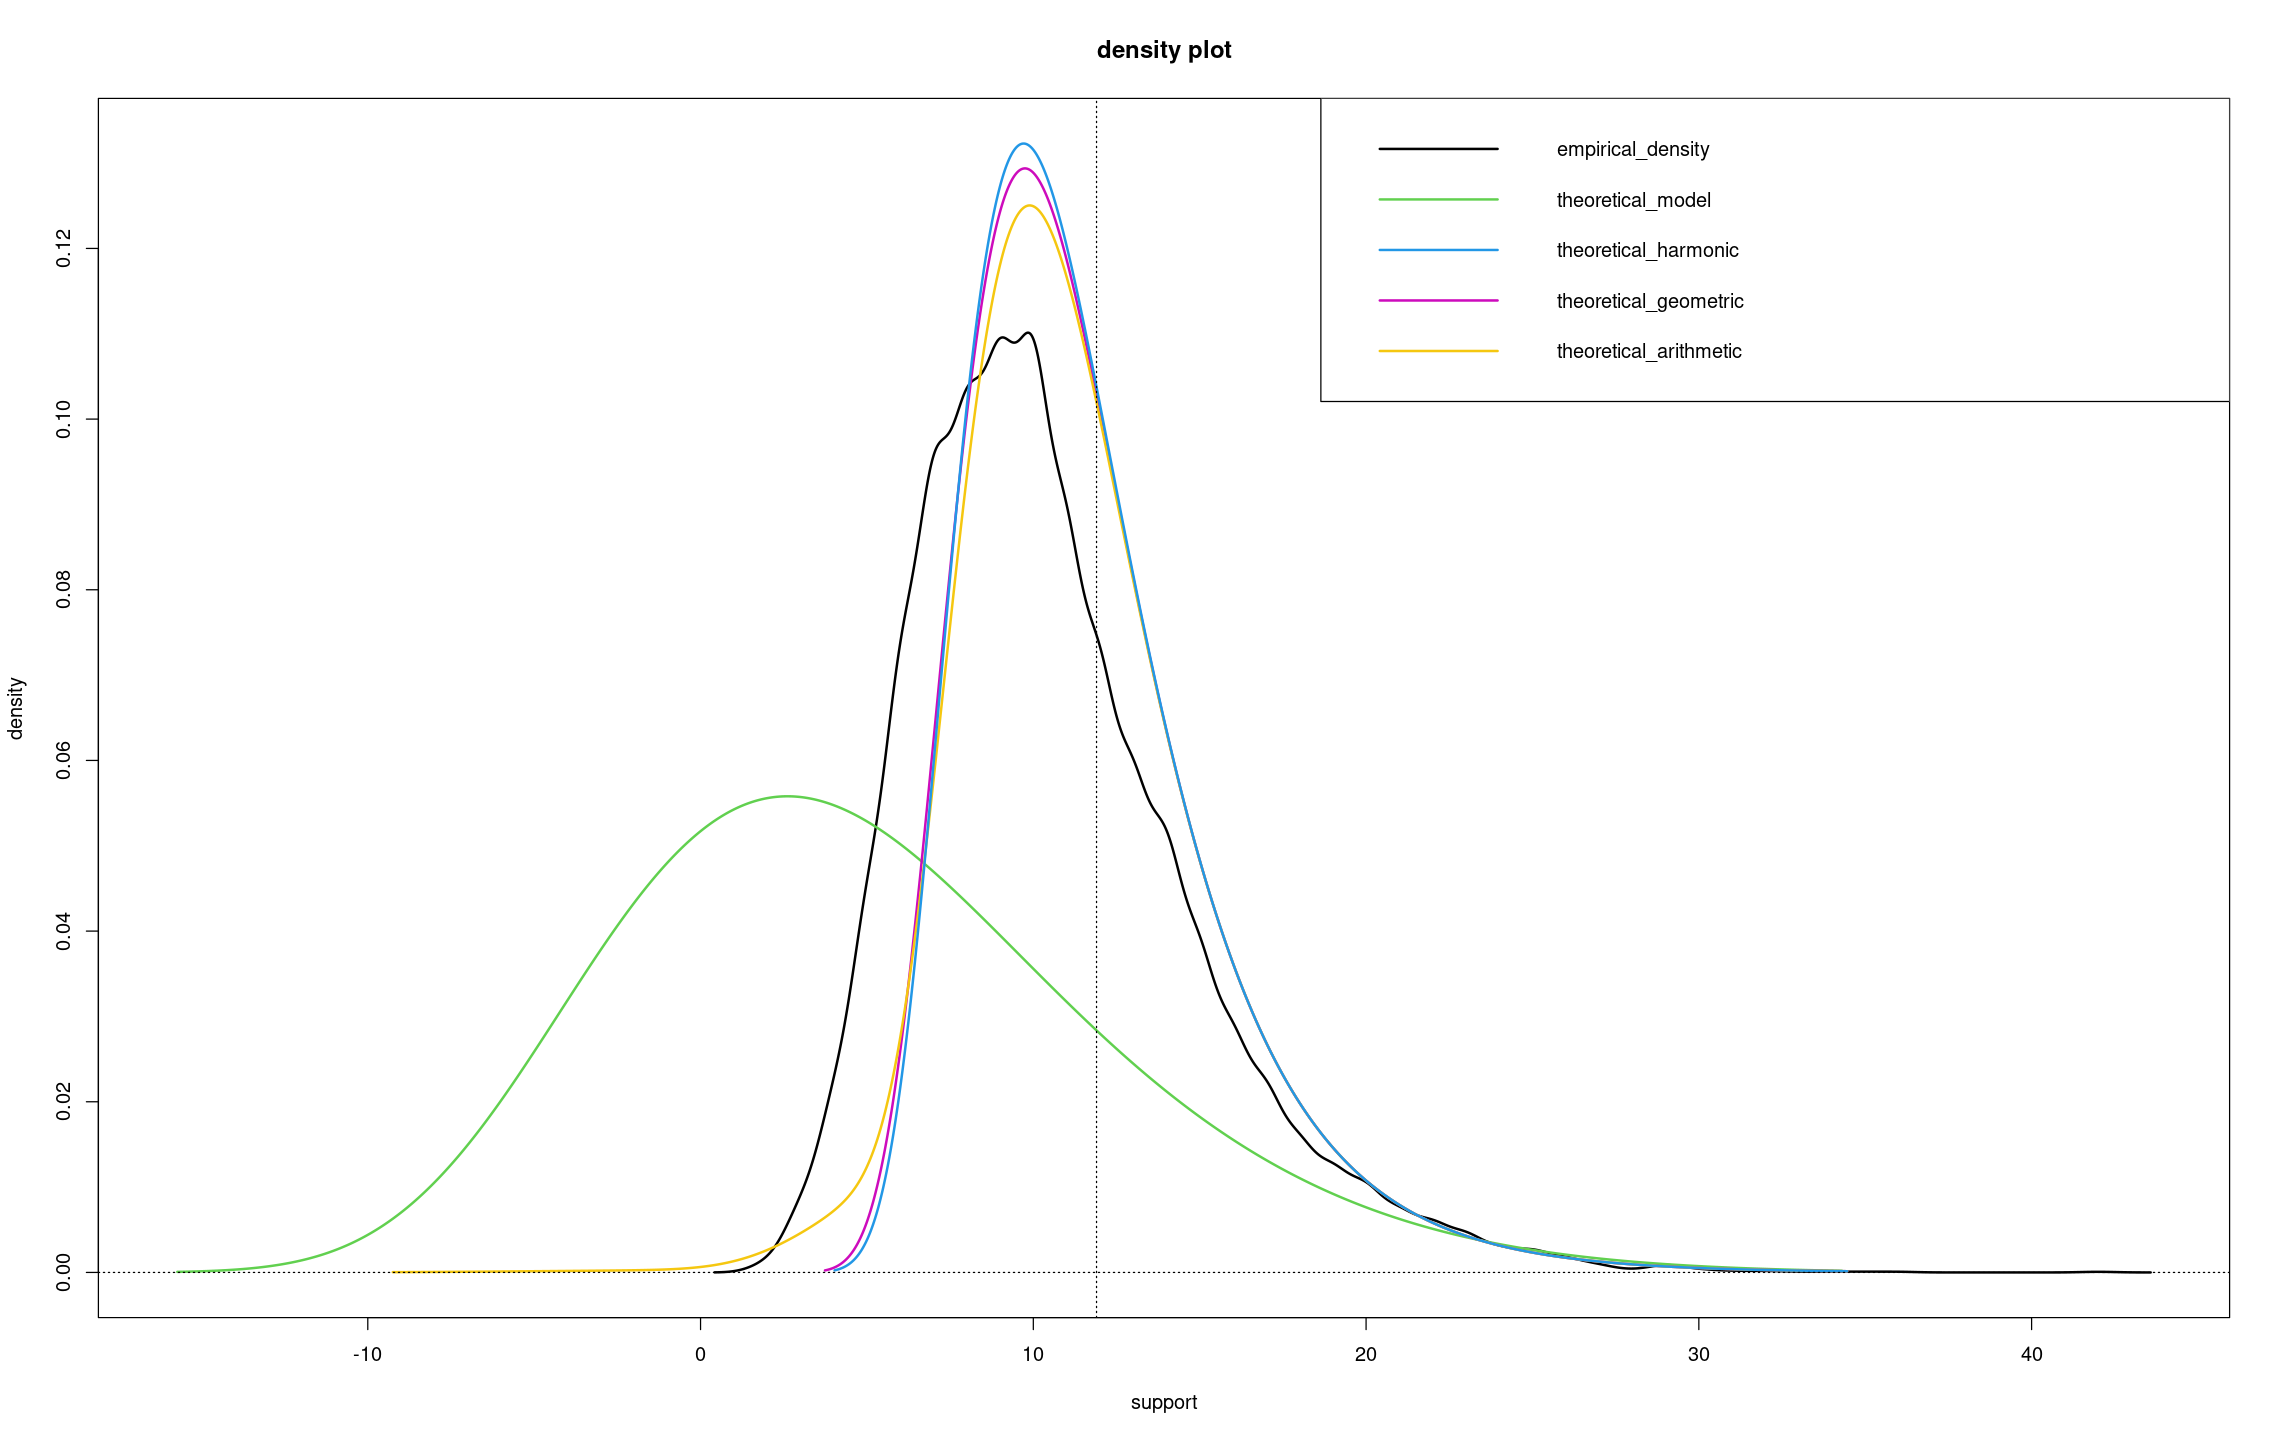

In [40]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [43]:
alpha <- n^(-2)

print(alpha)

[1] 8.888221364e-09


In [44]:
true_quantile <- NULL

print(true_quantile)

NULL


In [45]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
     lower_bound    estimate  upper_bound
31   27.99439186 69.53921845 111.08404504
32   23.74081109 75.75541831 127.77002553
33   26.69300053 68.46439072 110.23578091
34   31.11686407 59.34776634  87.57866860
71  -11.96924583 85.20854223 182.38633029
82  -13.10583586 79.50246136 172.11075858
101  27.76699204 49.59283975  71.41868746

$gev_mixture_model_quantile
[1] 84.0325053

$smalest_lower_ci_bound
[1] -13.10583586

$largest_upper_ci_bound
[1] 182.3863303

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 125.1117326 189.0672775 253.0228224

$quantile_gev_sup
  lower_bound   estimate upper_bound
1 18.03560232 21.2415441 24.44748587

In [46]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
     lower_bound    estimate  upper_bound
31   27.99439186 69.53921845 111.08404504
32   23.74081109 75.75541831 127.77002553
33   26.69300053 68.46439072 110.23578091
34   31.11686407 59.34776634  87.57866860
71  -11.96924583 85.20854223 182.38633029
82  -13.10583586 79.50246136 172.11075858
101  27.76699204 49.59283975  71.41868746

$gev_mixture_model_quantile
[1] 84.0325053

$smalest_lower_ci_bound
[1] -13.10583586

$largest_upper_ci_bound
[1] 182.3863303

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 125.1117326 189.0672775 253.0228224

$quantile_gev_sup
  lower_bound   estimate upper_bound
1 18.03560232 21.2415441 24.44748587

In [47]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
     lower_bound    estimate  upper_bound
31   27.99439186 69.53921845 111.08404504
32   23.74081109 75.75541831 127.77002553
33   26.69300053 68.46439072 110.23578091
34   31.11686407 59.34776634  87.57866860
71  -11.96924583 85.20854223 182.38633029
82  -13.10583586 79.50246136 172.11075858
101  27.76699204 49.59283975  71.41868746

$gev_mixture_model_quantile
[1] 84.0325053

$smalest_lower_ci_bound
[1] -13.10583586

$largest_upper_ci_bound
[1] 182.3863303

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 125.1117326 189.0672775 253.0228224

$quantile_gev_sup
  lower_bound   estimate upper_bound
1 18.03560232 21.2415441 24.44748587

In [136]:
options(repr.plot.width=23, repr.plot.height=6)

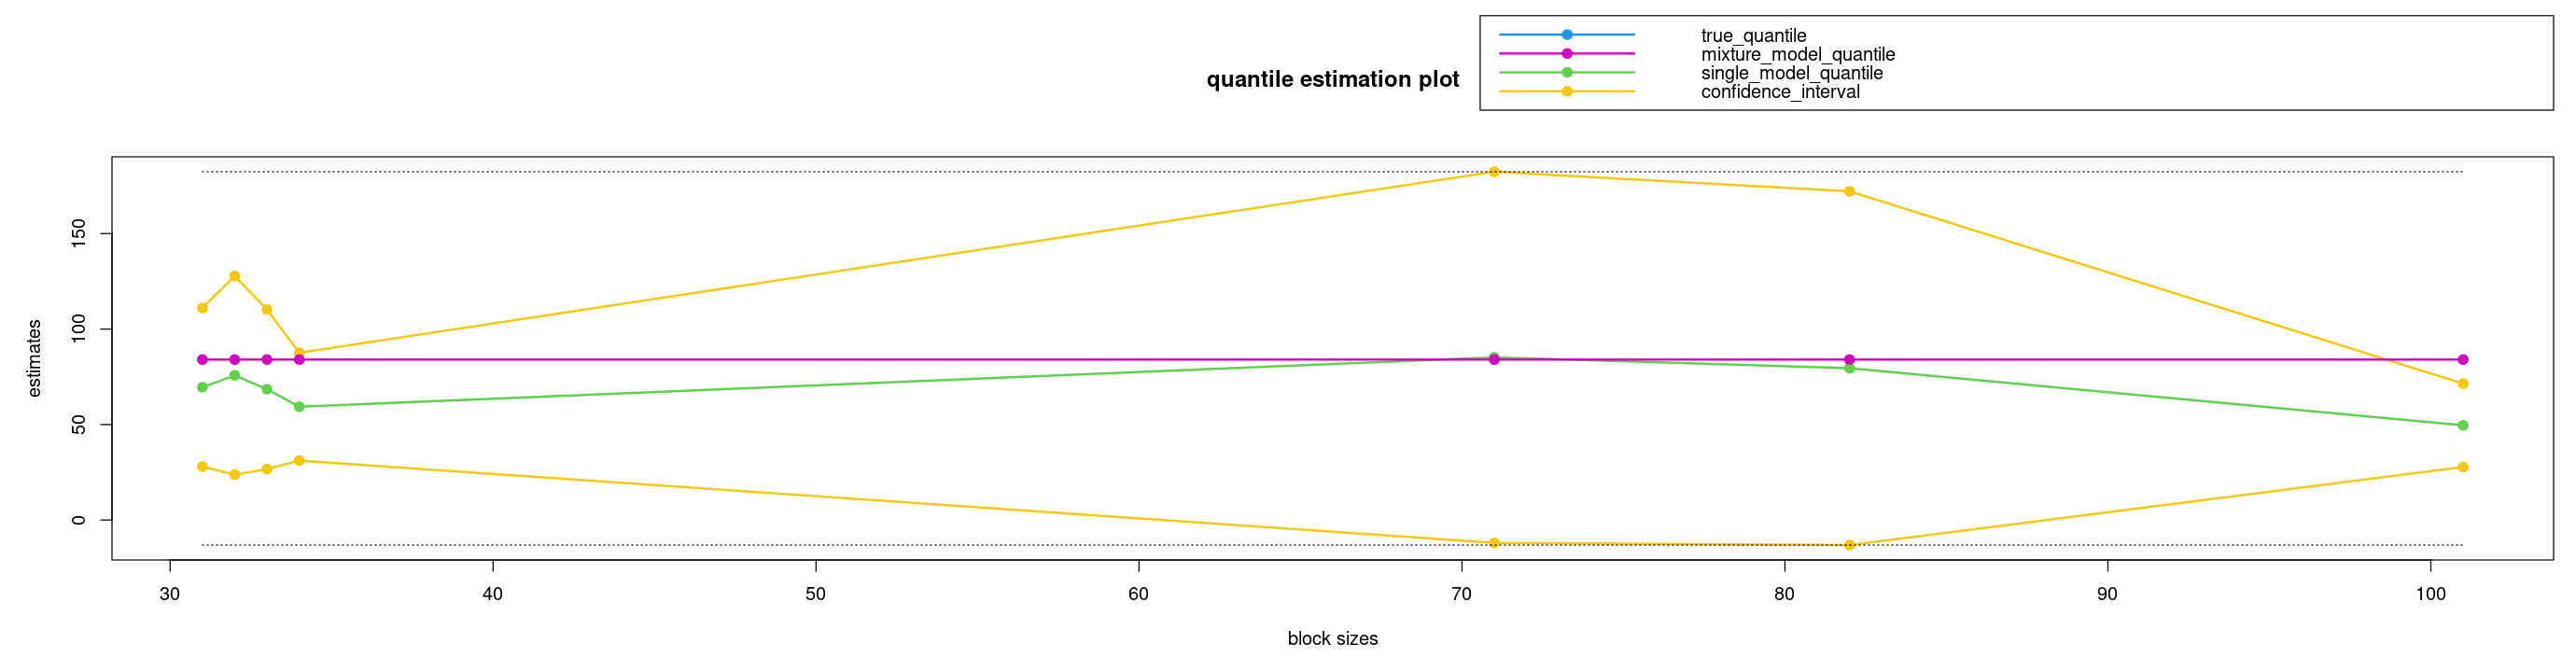

In [48]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")